# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:  Terry Konkin  
  
https://github.com/TKonkin/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# This cell is only run when the command is not successful in the terminal (occassionally happens).
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 6.3 MB/s eta 0:00:02
     ---- ----------------------------------- 1.6/12.8 MB 6.6 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 4.1 MB/s eta 0:00:03
     ------------ --------------------------- 3.9/12.8 MB 4.7 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.8 MB 5.0 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 5.1 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 5.3 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 5.4 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 5.6 MB/s eta 0:00:01
     ------------------------------------- -- 12.1/12.8 MB 5.7 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [5]:
# this url has a different source from what was submitted in D6, but the same article.

url = "https://web.archive.org/web/20250712011537/https://www.cnbc.com/2025/07/11/goldman-sachs-autonomous-coder-pilot-marks-major-ai-milestone.html"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html5lib')

article = soup.find('div', class_='Regular Article PageBuilder-page')
article_html = str(article)

file_path = r'C:\Projects\article-summarizer\goldman-saks-ai-powered-new-employee.html'

with open(file_path, 'wb') as f:
    f.write(article_html.encode('utf-8'))

print(f"article html saved to {file_path}")



article html saved to C:\Projects\article-summarizer\goldman-saks-ai-powered-new-employee.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [8]:
# polarity score

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

with open(file_path, 'r', encoding='utf-8') as f:
    html_content = f.read()
    
soup = BeautifulSoup(html_content, 'html.parser')

for tag in soup(['script', 'style']):
    tag.decompose()

article_text = soup.get_text(separator='\n', strip=True)

doc = nlp(article_text)

print(f"article polarity: {doc._.blob.polarity:.3f}")





article polarity: 0.129


In [9]:
# number of sentences

sentence_count = 0
for sentence in doc.sents:
    sentence_count += 1

print(f"number of sentences: {sentence_count}")




number of sentences: 32


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [15]:
tokens = []

for token in doc:
    
    if not token.is_stop and not token.is_punct and not token.is_space:
        
        tokens.append(token.text.lower())

word_freq = Counter(tokens)

common_tokens = word_freq.most_common(5)

print("5 most common tokens:")
for token in common_tokens:
    print(token[0])

print("5 most common tokens, and their frequencies:")
for token, freq in common_tokens:
    print(f"'{token}': {freq} times")



5 most common tokens:
ai
goldman
argenti
devin
said
5 most common tokens, and their frequencies:
'ai': 17 times
'goldman': 12 times
'argenti': 8 times
'devin': 8 times
'said': 8 times


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [16]:
lemmas = []

for token in doc:
    
    if not token.is_stop and not token.is_punct and not token.is_space:
        
        lemmas.append(token.lemma_.lower())

lemma_freq = Counter(lemmas)

common_lemmas = lemma_freq.most_common(5)

print("5 most common lemmas:")
for lemma in common_lemmas:
    print(lemma[0])

print("5 most common lemmas, and their frequencies:")
for lemma, freq in common_lemmas:
    print(f"'{lemma}': {freq} times")



5 most common lemmas:
ai
goldman
say
engineer
argenti
5 most common lemmas, and their frequencies:
'ai': 18 times
'goldman': 12 times
'say': 10 times
'engineer': 8 times
'argenti': 8 times


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

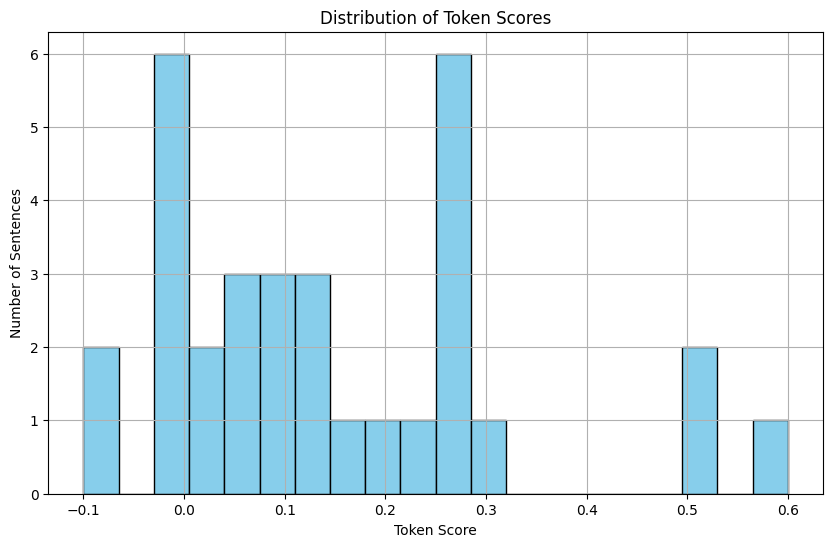

In [21]:
token_scores = []

for sent in doc.sents:
    token_scores.append(sent._.blob.polarity)

plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, edgecolor='black', color='skyblue')
plt.title("Distribution of Token Scores")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# the most common range of scores is 0 to 0.3



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

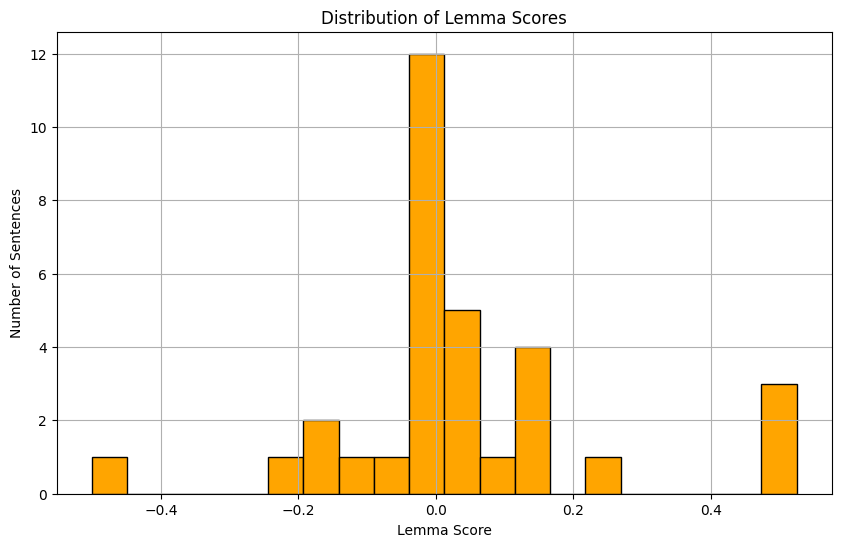

In [24]:
lemma_scores = []

for sentence in doc.sents:
    
    lemmas_in_sentence = []

    for token in sentence:
        
        if not token.is_stop and not token.is_punct and not token.is_space:
            
            lemmas_in_sentence.append(token.lemma_.lower())
    
    clean_sentence = ' '.join(lemmas_in_sentence)

    clean_doc = nlp(clean_sentence)

    polarity_score = clean_doc._.blob.polarity

    lemma_scores.append(polarity_score)

plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Lemma Scores")
plt.xlabel("Lemma Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# the most common range of scores is -.02 to 0.2



7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.1  
* Cutoff Score (lemmas):  0.0

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [25]:
cutoff_token_score = 0.1

summary_token_sentences = []

for index in range(len(token_scores)):
    score = token_scores[index]
    sentence = list(doc.sents)[index]
    
    if score > cutoff_token_score:
        summary_token_sentences.append(sentence.text.strip())

token_based_summary = ' '.join(summary_token_sentences)

print("=== Token-Based Summary ===")
print(token_based_summary)



=== Token-Based Summary ===
The program, named Devin, became known in technology circles last year with Cognition's claim that it had created the world's first AI software engineer. It's the latest indicator of the dizzying speed in which AI is being adopted in the corporate world. In this article
GS
Follow your favorite stocks
CREATE FREE ACCOUNT
watch now
VIDEO
3:21
03:21
Goldman Sachs tests agentic AI to automate software engineering
Worldwide Exchange
The newest hire at
Goldman Sachs
isn't human. The program, named Devin, became known in technology circles last year with Cognition's claim that it had created the world's first AI software engineer. "We're going to start augmenting our workforce with Devin, which is going to be like our new employee who's going to start doing stuff on the behalf of our developers," Argenti said this week in an interview. It's the latest indicator of the dizzying speed in which AI is being adopted in the corporate world. Just last year, Wall Street fi

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [26]:
summary_doc_token = nlp(token_based_summary)

print("Polarity Score (Token-Based Summary):", round(summary_doc_token._.blob.polarity, 3))
print("Number of Sentences (Token-Based Summary):", len(summary_token_sentences))



Polarity Score (Token-Based Summary): 0.261
Number of Sentences (Token-Based Summary): 16


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [27]:
cutoff_lemma_score = 0.0 # from above calcs

# Create a list to hold selected sentences for the summary
summary_lemma_sentences = []

# Loop through each sentence and compare its lemma-based score to the cutoff
for index in range(len(lemma_scores)):
    score = lemma_scores[index]
    sentence = list(doc.sents)[index]

    if score > cutoff_lemma_score:
        clean_sentence = sentence.text.strip() 
        summary_lemma_sentences.append(clean_sentence)

# Join the selected sentences into a single summary string
lemma_based_summary = ' '.join(summary_lemma_sentences)

# Print the summary
print("=== Lemma-Based Summary ===")
print(lemma_based_summary)



=== Lemma-Based Summary ===
In this article
GS
Follow your favorite stocks
CREATE FREE ACCOUNT
watch now
VIDEO
3:21
03:21
Goldman Sachs tests agentic AI to automate software engineering
Worldwide Exchange
The newest hire at
Goldman Sachs
isn't human. "We're going to start augmenting our workforce with Devin, which is going to be like our new employee who's going to start doing stuff on the behalf of our developers," Argenti said this week in an interview. Now, the arrival of agentic AI on Wall Street — referencing programs like Devin that don't just help humans with tasks like summarizing documents or writing emails, but instead execute complex multi-step jobs like building entire apps — signals a much larger shift, with greater potential rewards. At Goldman Sachs, one of the world's top investment banks, this more powerful form of AI has the potential to boost worker productivity by up to three or four times the rate of previous AI tools, according to Argenti. In Icon
Arrows pointing 

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [28]:
summary_doc_lemma = nlp(lemma_based_summary)

print("Polarity Score (Lemma-Based Summary):", round(summary_doc_lemma._.blob.polarity, 3))
print("Number of Sentences (Lemma-Based Summary):", len(summary_lemma_sentences))



Polarity Score (Lemma-Based Summary): 0.171
Number of Sentences (Lemma-Based Summary): 14


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  
    
Initial article: 0.129  
Token summary: 0.261  
Lemma summary:  0.171  

Both summaries are higher because they are based on greater than the cutoff score, so are therefore reflective of the most positive aspects of the article.  
 
The token summary is higher because (according to AI) it considers the raw verbiage, so is more sensitive to sentiment spikes.


13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?  
    
There does not appear to be a noticeable difference.  Similar to the previous assignment on polarity, sentiment seems to be more suited to customer reviews, rather than a news article such as this.